In [1]:
import geopandas as gpd
import fiona

soil_type_map = r"C:\Users\telukkari\Documents\Data\maapera_20_50k.gdb\a00000013.gdbtable"

# List all layers
layers = fiona.listlayers(soil_type_map)
print("Layers:", layers)

# Load one table into GeoPandas
layer = 'mp20k_maalajit'
soil_gdf = gpd.read_file(soil_type_map, layer=layer)

print(soil_gdf["POHJAMAALAJI"].unique())

Layers: ['mp20k_maalajit']


c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


['Kartoittamaton (0)' 'Saraturve (Ct) RT' 'Hienoainesmoreeni (HMr) RT'
 'Hiekka (Hk) RT' 'Hiesu (Hs) RT' 'hieno Hieta (HHt) RT'
 'karkea Hieta (KHt) RT' 'Liejusavi (LjSa) RT' 'Hiekkamoreeni (Mr) RT'
 'Lieju (Lj) RT' 'Liejuhiesu (LjHs) RT' 'liejuinen hieno Hieta (LjHHt) RT'
 'liejuinen Hieta (karkea) (LjHt) RT' 'Kalliomaa (Ka) RT' 'Savi (Sa) RT'
 'Sora (Sr) RT' 'Kiviä (Ki) RT' 'liejuinen Hiekka (LjHk) RT'
 'Lohkareita (Lo) RT' 'Soramoreeni (SrMr) RT' 'Rapakallio (RpKa) RT'
 'Rakka (RaKa) RT' 'Rahkaturve (St) RT' 'Täytemaa (Ta)' 'Vesi (Ve)'
 'Turvetuotantoalue (Tu) RT']


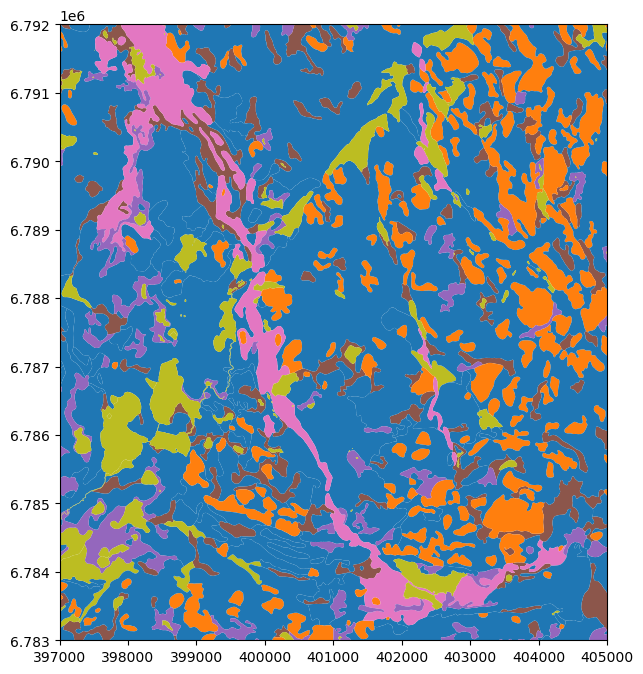

In [2]:
import matplotlib.pyplot as plt

# Create a matplotlib figure + axes
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the GeoDataFrame onto that axes
soil_gdf.plot(
    ax=ax,
    column="POHJAMAALAJI",   # or "POHJAMAALAJI"
    legend=False,
)

# Set custom x/y limits
ax.set_xlim(397000, 405000)
ax.set_ylim(6783000, 6792000)

plt.show()

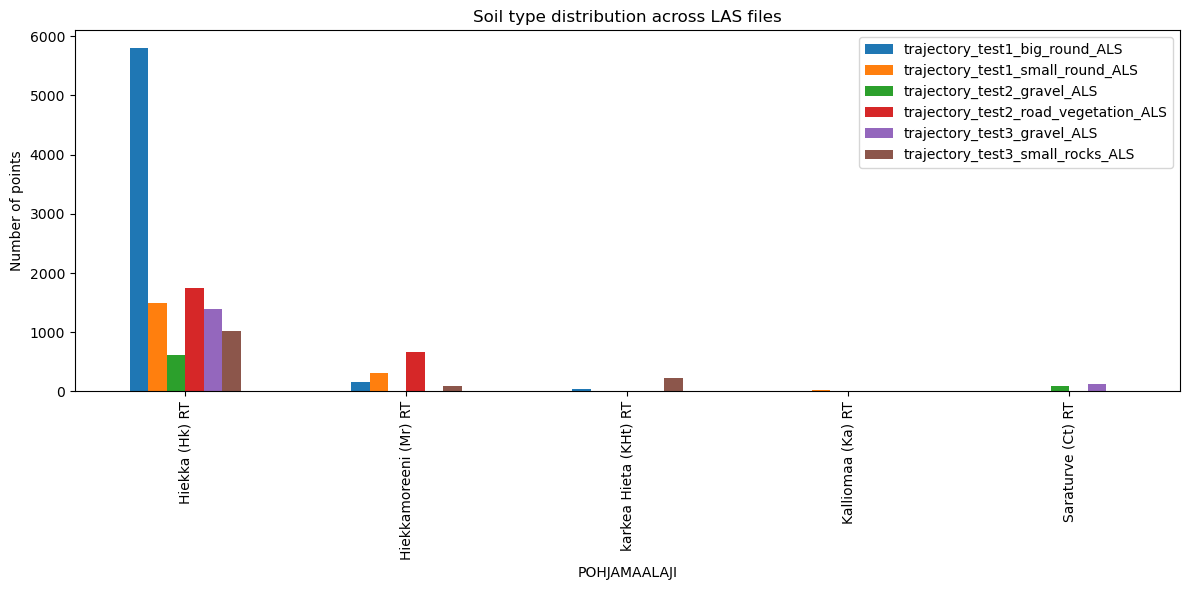

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import laspy
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd


las_files = [
    (r"E:\MLS-data\trajectories\als_frame\trajectory_test1_big_round_ALS.las"),
    (r"E:\MLS-data\trajectories\als_frame\trajectory_test1_small_round_ALS.las"),
    (r"E:\MLS-data\trajectories\als_frame\trajectory_test2_gravel_ALS.las"),
    (r"E:\MLS-data\trajectories\als_frame\trajectory_test2_road_vegetation_ALS.las"),
    (r"E:\MLS-data\trajectories\als_frame\trajectory_test3_gravel_ALS.las"),
    (r"E:\MLS-data\trajectories\als_frame\trajectory_test3_small_rocks_ALS.las"),
]

all_counts = {} 


for las_file in las_files:
    las = laspy.read(las_file)

    # Extract coordinates
    xs, ys = las.x, las.y

    # Build point GeoDataFrame
    points_gdf = gpd.GeoDataFrame(
        geometry=gpd.points_from_xy(xs, ys, crs=soil_gdf.crs)
    )

    # Spatial join to get soil type
    joined = gpd.sjoin(
        points_gdf,
        soil_gdf[["POHJAMAALAJI", "geometry"]],
        how="left",
        predicate="within"
    )

    # print(joined.head())

    counts = joined["POHJAMAALAJI"].value_counts()

    counts_dict = counts.to_dict()
    # print("Counts dict:", counts_dict)

    all_counts[Path(las_file).stem] = counts_dict


df = pd.DataFrame(all_counts).fillna(0).astype(int)

df.plot(kind="bar", figsize=(12,6))
plt.xlabel("POHJAMAALAJI")
plt.ylabel("Number of points")
plt.title("Soil type distribution across LAS files")
plt.tight_layout()
plt.show()

13786


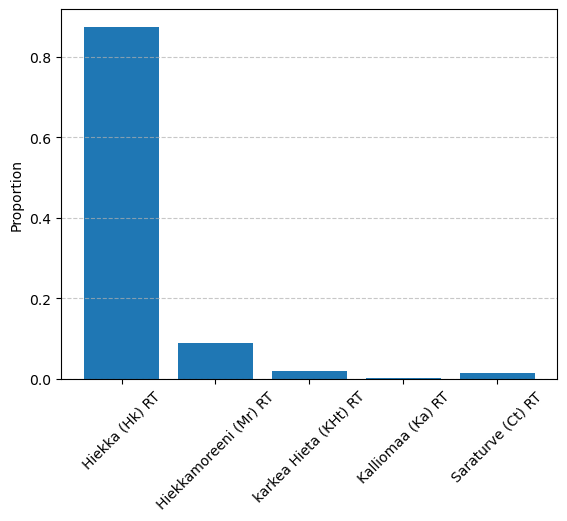

In [6]:
result = {}

for outer_key, inner_dict in all_counts.items():
    for inner_key, inner_value in inner_dict.items():
        # Accumulate (sum) values for repeated keys
        result[inner_key] = result.get(inner_key, 0) + inner_value

keys = list(result.keys())
values = list(result.values())

total = sum(values)
print(total)

proportion = [n / total for n in values]

# Create the bar plot
plt.bar(keys, proportion)

# Add labels and title
plt.ylabel('Proportion')

# Optional: rotate x-labels for readability
plt.xticks(rotation=45)

# Show grid and display plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3414456967.py, line 2)

c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field with same name (description) already exists in (GeologicCollection). Skipping newer ones
  return ogr_read(


KeyboardInterrupt: 

Exception ignored in: 'pyogrio._err.stacking_error_handler'
Traceback (most recent call last):
  File "c:\Users\telukkari\AppData\Local\anaconda3\Lib\warnings.py", line 112, in _showwarnmsg
    _showwarnmsg_impl(msg)
  File "c:\Users\telukkari\AppData\Local\anaconda3\Lib\warnings.py", line 30, in _showwarnmsg_impl
    file.write(text)
  File "c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\ipykernel\iostream.py", line 662, in write
    self._schedule_flush()
  File "c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\ipykernel\iostream.py", line 559, in _schedule_flush
    self.pub_thread.schedule(_schedule_in_thread)
  File "c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\ipykernel\iostream.py", line 266, in schedule
    self._event_pipe.send(b"")
  File "c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\zmq\sugar\socket.py", line 696, in send
    return super().send(data, flags=flags, copy=copy, track=track)
           ^^^^^^^^^^^^^^^^^^^

<Axes: >

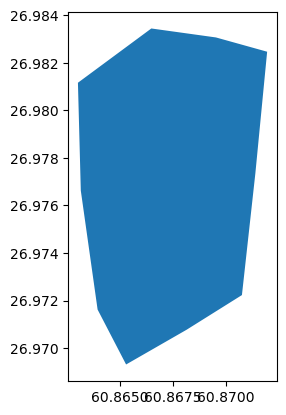

In [ ]:
import geopandas as gpd
gdf = gpd.read_file(r"C:\Users\telukkari\Downloads\inspire_ge_geology_geomorphologicfeature_superficial_deposits_of_finland_1m_epsg4258_gml\INSPIRE_GE_Geology_GeomorphologicFeature_superficial_deposits_of_finland_1m.gml")
gdf.plot()
